<a href="https://colab.research.google.com/github/POOJACH76/API_ecommerce/blob/master/face_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=5ce776bbfdc5421c24211a7b2c248ad884c178466b87e6d0d9f4b91e0f04c917
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import face_recognition

In [3]:

from google.colab.patches import cv2_imshow
from imutils import paths
import face_recognition
import glob
import cv2
import os

In [4]:
!unzip /content/Unlebaled.zip -d path_to_directory




Archive:  /content/Unlebaled.zip
  inflating: path_to_directory/unlabelled_test_images/download034.jpg  
  inflating: path_to_directory/unlabelled_test_images/download007.jpg  
  inflating: path_to_directory/unlabelled_test_images/download016.jpg  
  inflating: path_to_directory/unlabelled_test_images/download048.jpg  
  inflating: path_to_directory/unlabelled_test_images/download056.jpg  
  inflating: path_to_directory/unlabelled_test_images/download021.jpg  
  inflating: path_to_directory/unlabelled_test_images/download060.jpg  
  inflating: path_to_directory/unlabelled_test_images/download051.jpg  
  inflating: path_to_directory/unlabelled_test_images/download040.jpg  
  inflating: path_to_directory/unlabelled_test_images/download059.jpg  
  inflating: path_to_directory/unlabelled_test_images/download014.jpg  
  inflating: path_to_directory/unlabelled_test_images/download006.jpg  
  inflating: path_to_directory/unlabelled_test_images/download042.jpg  
  inflating: path_to_directory/

In [5]:

from google.colab.patches import cv2_imshow
from sklearn.cluster import DBSCAN
from imutils import build_montages
import numpy as np



In [9]:
import zipfile
import os
import cv2
import face_recognition
import numpy as np

# Define the path to the ZIP file and the directory to extract to
zip_file_path = "/content/Unlebaled.zip"
extracted_dir_path = "/content/Unlabeled"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

data = []

# Iterate through each file in the extracted directory
for root, dirs, files in os.walk(extracted_dir_path):
    for file in files:
        file_path = os.path.join(root, file)
        print("[INFO] processing image {}".format(file_path))

        # Read the image
        image = cv2.imread(file_path)
        if image is None:
            continue

        # Convert image from BGR to RGB
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Detect face locations using a CNN model
        boxes = face_recognition.face_locations(rgb, model="cnn")

        # Compute facial encodings
        encodings = face_recognition.face_encodings(rgb, boxes)

        # Build a dictionary of image path, bounding box location, and encodings
        d = [{"imagePath": file_path, "loc": box, "encoding": enc} for (box, enc) in zip(boxes, encodings)]
        data.extend(d)

# Convert the data into a numpy array
np_data = np.array(data)
# Extract the 128-d facial encodings and place them in a list
np_encodings = [item["encoding"] for item in np_data]


[INFO] processing image /content/Unlabeled/unlabelled_test_images/download018.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download060.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download021.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download028.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download020.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download037.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download044.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download043.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download041.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download052.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download042.jpg
[INFO] processing image /content/Unlabeled/unlabelled_test_images/download031.jpg
[INFO] processin

In [10]:
print("[INFO] clustering...")
# initializing the clustering object
cluster = DBSCAN(metric = "euclidean", n_jobs = -1)
# fitting the clustering model on the encoded data
cluster.fit(np_encodings)


[INFO] clustering...


DBSCAN(n_jobs=-1)

In [11]:
labelIDs = np.unique(cluster.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] No. of unique faces: {}".format(numUniqueFaces))
print("[INFO] Label IDs: {}, where [-1] refers to unidentified faces or outliers".format(labelIDs))



[INFO] No. of unique faces: 7
[INFO] Label IDs: [-1  0  1  2  3  4  5  6], where [-1] refers to unidentified faces or outliers


[INFO] faces for face ID: -1


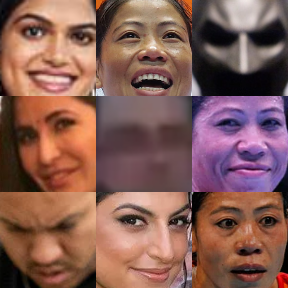

[INFO] faces for face ID: 0


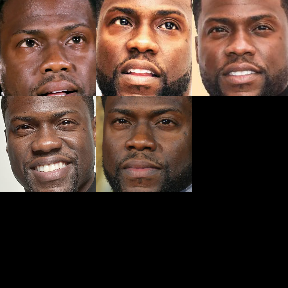

[INFO] faces for face ID: 1


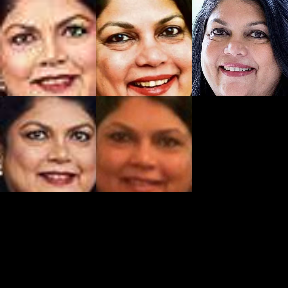

[INFO] faces for face ID: 2


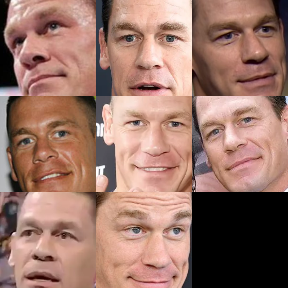

[INFO] faces for face ID: 3


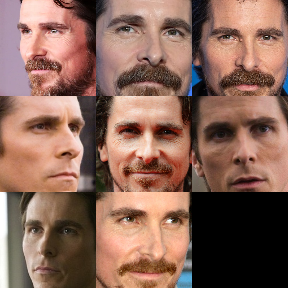

[INFO] faces for face ID: 4


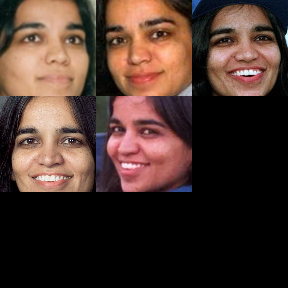

[INFO] faces for face ID: 5


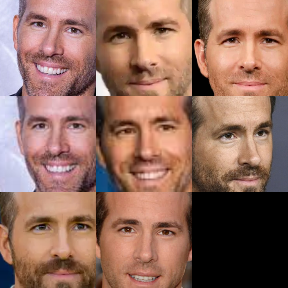

[INFO] faces for face ID: 6


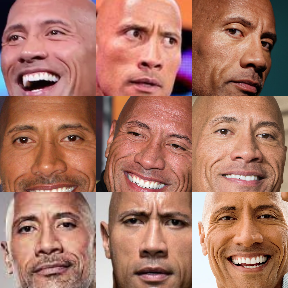

In [12]:
# loop over the unique face integers
for labelID in labelIDs:
  # find all indexes into the 'pkl_data' array that belong to the current label ID, then randomly sample a maximum of 15 indexes from the set
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = np.where(cluster.labels_ == labelID)[0]
  idxs = np.random.choice(idxs, size = min(15, len(idxs)), replace = False)
  # initialize the list of faces to include in the montage
  faces = []

  for i in idxs:
    # load the input image and extract the face ROI
    current_image = cv2.imread(np_data[i]["imagePath"])
    (top, right, bottom, left) = np_data[i]["loc"]
    current_face = current_image[top:bottom, left:right]
    # force resize the face ROI to 96x96 and then add it to the faces montage list
    current_face = cv2.resize(current_face, (96, 96))
    faces.append(current_face)

  # create a montage using 96x96 "tiles" with 5 rows and 5 columns
  montage = build_montages(faces, (96, 96), (3, 3))[0]

  # show the output montage
  # current_title = "Face ID #{}".format(labelID)
  # current_title = "Unknown Faces" if labelID == -1 else current_title
  cv2_imshow(montage)

In [13]:

!pip install face_recognition
!pip install -q streamlit
# If ipykernel & ipython version related warnings are shown while installing streamlit: IGNORE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [14]:
%%writefile streamlit-app.py

import os
import time
import shutil
import tempfile
import numpy as np
import streamlit as st

import cv2
import face_recognition
from sklearn.cluster import DBSCAN
from imutils import build_montages

flag1 = 0

st.set_page_config(layout = 'wide')

#st.title("Any Face Clustering")
st.markdown("Any Face Clustering", unsafe_allow_html=True)

st.text(" ")
st.text("Upload Images of Multiple Faces (with AT LEAST 3 images of a particular face).")
st.text("Please wait a while after uploading the images until you see a dialog box stating that the images were uploaded successfully.")
st.text("Sometimes Streamlit takes unusually more time to upload the images... if failed, try compressing the images before uploading.")

uploaded_files = st.file_uploader("", type = ["png","jpg","jpeg"], accept_multiple_files = True)

no_of_files = len(uploaded_files)

if no_of_files > 0:
  placeholder = st.empty()
  placeholder.success("{} Images uploaded successfully!".format(no_of_files))
  time.sleep(3)
  placeholder.empty()
  data = []

  for f in uploaded_files:
    tfile = tempfile.NamedTemporaryFile(delete = False)
    tfile.write(f.read())
    image = cv2.imread(tfile.name)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb, model = "cnn")
    encodings = face_recognition.face_encodings(rgb, boxes)
    d = [{"imagePath": tfile.name, "loc": box, "encoding": enc} for (box, enc) in zip(boxes, encodings)]
    data.extend(d)

  # converting the data into a numpy array
  data_arr = np.array(data)
  # extracting the 128-d facial encodings and placing them in a list
  encodings_arr = [item["encoding"] for item in data_arr]

  # initializing and fitting the clustering model on the encoded data
  cluster = DBSCAN(min_samples = 3)
  cluster.fit(encodings_arr)
  st.balloons()

  labelIDs = np.unique(cluster.labels_)
  numUniqueFaces = len(np.where(labelIDs > -1)[0])

  st.subheader("Number of unique faces identified (excluding the unknown faces) is: " + str(numUniqueFaces))

  if flag1 == 0:
    cols1 = st.columns(numUniqueFaces + 1)
    flag1 = 1

  # loop over the unique face integers
  for labelID in labelIDs:
    idxs = np.where(cluster.labels_ == labelID)[0]
    idxs = np.random.choice(idxs, size = min(15, len(idxs)), replace = False)
    # initializing the list of faces to include in the montage
    faces = []
    # initializing the list of whole_images to include in the zip files of each faces, to be downloaded by the user
    whole_images = []

    if labelID != -1:
      dir_name = 'face#{}'.format(labelID + 1)
      os.mkdir(dir_name)

    for i in idxs:
      current_image = cv2.imread(data_arr[i]["imagePath"])
      rgb_current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)
      (top, right, bottom, left) = data_arr[i]["loc"]
      current_face = rgb_current_image[top:bottom, left:right]
      current_face = cv2.resize(current_face, (96, 96))
      whole_images.append(rgb_current_image)
      faces.append(current_face)

      if labelID != -1:
        face_image_name = 'image{}.jpg'.format(i)
        cv2.imwrite(os.path.join(dir_name, face_image_name), current_image)

    if labelID != -1:
      shutil.make_archive('zip_face#{}'.format(labelID + 1), 'zip', dir_name)
      # deleting the directory and image files contained in it as we need only the zip file which has been created already
      shutil.rmtree('face#{}'.format(labelID + 1))

    montage = build_montages(faces, (96, 96), (2, 2))[0]

    current_title = "Face #{}:".format(labelID + 1)
    expander_caption = "Images with Face #{}:".format(labelID + 1)
    current_title = "Unknown:" if labelID == -1 else current_title

    with cols1[labelID + 1]:
      st.write(current_title)
      st.image(montage)
    if labelID != -1:
      with st.expander(expander_caption):
        # displaying the images of the current face
        cols2 = st.columns(3)
        for j in range(len(whole_images)):
          with cols2[j%3]:
            st.image(whole_images[j], use_column_width = 'always')
        # providing an option for the user to download folders with images of particular faces after clustering as zip files
        with open("zip_face#{}.zip".format(labelID + 1), "rb") as fp:
          btn = st.download_button(
              label="Download ZIP of Clustered Images with Face #{}".format(labelID + 1),
              data=fp,
              file_name="clustered_faces#{}.zip".format(labelID + 1),
              mime="application/zip"
          )
        fp.close()

Writing streamlit-app.py


In [ ]:
!streamlit run streamlit-app.py & npx localtunnel --port 8501 --server.enableCORS = false --server.enableXsrfProtection = false





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.164.116:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 